In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_all = pd.read_csv("data/first data.csv")
df_all.shape

(120, 23)

In [4]:
df = df_all.drop('Questionnaire Number',axis=1)
df.drop('human-resources-actor',axis=1, inplace=True)
df.drop('technology-actor',axis=1, inplace=True)
df.drop('regulation-actor',axis=1, inplace=True)
df.drop('administrative-dimension-actor',axis=1, inplace=True)
df.drop('external-users',axis=1, inplace=True)
df.drop('state-institution',axis=1, inplace=True)
df.drop('scientific-community',axis=1, inplace=True)
# df.drop('professional-association',axis=1, inplace=True)
df.drop('economic-actor',axis=1, inplace=True)
df.drop('technical-dimension',axis=1, inplace=True)
df.drop('political-social',axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
sex                                      120 non-null int64
education                                120 non-null int64
field                                    120 non-null int64
background                               120 non-null int64
history in middle management             120 non-null int64
History on the post of top executives    120 non-null int64
age                                      120 non-null int64
Job                                      120 non-null int64
Duration-information-system              120 non-null int64
Time-information-system                  120 non-null int64
familiarity-information-system           120 non-null int64
professional-association                 120 non-null int64
dtypes: int64(12)
memory usage: 11.3 KB


In [6]:
X = df.drop("professional-association", axis = 1)
y = df["professional-association"]

In [7]:
X.shape

(120, 11)

In [8]:
y.shape

(120,)

In [9]:
X.head()

,sex,education,field,background,history in middle management,History on the post of top executives,age,Job,Duration-information-system,Time-information-system,familiarity-information-system
0,1,5,1,1,1,1,1,1,1,1,1
1,1,2,1,1,1,1,1,1,1,1,1
2,1,2,1,1,1,1,1,1,1,1,1
3,1,2,1,2,1,1,1,1,1,1,2
4,1,3,1,2,2,1,1,1,2,1,2


____

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 11), (90,), (30, 11), (30,))

In [11]:
seed = 42
models = []
models.append(('XGBoost', XGBClassifier(seed = seed) ))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
tree = DecisionTreeClassifier(max_depth=4, random_state=seed)
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))

results, names  = [], []
num_folds = 10
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring, n_jobs= -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBoost: 0.977778 (0.044444)
SVC: 0.922222 (0.086781)
RF: 0.977778 (0.044444)
KNN: 0.911111 (0.083148)


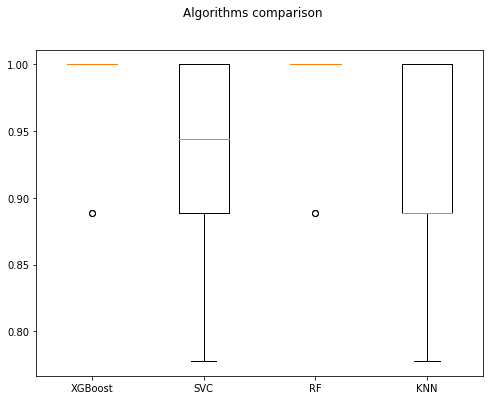

In [12]:
fig = plt.figure(figsize=(8,6))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()